# BDA - Project SPark MLlib Vs Mahout performance comparision

### Submitted by:
#### Name      : Muhammad Amin Ghias
#### ERP ID    : 25366

Date : 2nd June 2022

## Importing Libraries

In [1]:
import pandas as pd
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Comibing datasets to make one dataset

In [4]:
df1= pd.read_csv("raw_data/20160930_203718.csv")
df2= pd.read_csv("raw_data/20161001_231809.csv")
df3= pd.read_csv("raw_data/20161003_085624.csv")
df4= pd.read_csv("raw_data/20161004_104124.csv")
df5= pd.read_csv("raw_data/20161005_140846.csv")
df6= pd.read_csv("raw_data/20161006_182224.csv")
df7= pd.read_csv("raw_data/20161007_210049.csv")
df8= pd.read_csv("raw_data/20161008_234508.csv")
df9= pd.read_csv("raw_data/20161010_095046.csv")
df10= pd.read_csv("raw_data/20161011_113032.csv")
df11= pd.read_csv("raw_data/20161013_143355.csv")
df12= pd.read_csv("raw_data/20161014_184659.csv")
df13= pd.read_csv("raw_data/20161016_053656.csv")

In [5]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)


(295719, 20)
(295516, 20)
(295700, 20)
(295653, 20)
(295534, 20)
(295499, 20)
(295700, 20)
(295524, 20)
(295747, 20)
(295391, 20)
(295679, 20)
(295881, 20)
(295617, 20)


In [6]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13], axis=0)
print(df.shape)
df.head()

(3843160, 20)


,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0.000,0.0,49.7534,23.7184,233.2737,0.8993,0.2231,0.6365,1.1493,0.8483,1.2534,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385
1,0.309,0.0,55.8400,26.6200,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,9.4472,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167
2,0.618,0.0,55.8400,26.6200,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,33.0704,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436
3,0.926,0.0,55.8400,26.6200,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,58.3847,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363
4,1.234,0.0,55.8400,26.6200,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,71.7732,79.9474,79.8631,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3843160 entries, 0 to 295616
Data columns (total 20 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Time (s)            float64
 1   CO (ppm)            float64
 2   Humidity (%r.h.)    float64
 3   Temperature (C)     float64
 4   Flow rate (mL/min)  float64
 5   Heater voltage (V)  float64
 6   R1 (MOhm)           float64
 7   R2 (MOhm)           float64
 8   R3 (MOhm)           float64
 9   R4 (MOhm)           float64
 10  R5 (MOhm)           float64
 11  R6 (MOhm)           float64
 12  R7 (MOhm)           float64
 13  R8 (MOhm)           float64
 14  R9 (MOhm)           float64
 15  R10 (MOhm)          float64
 16  R11 (MOhm)          float64
 17  R12 (MOhm)          float64
 18  R13 (MOhm)          float64
 19  R14 (MOhm)          float64
dtypes: float64(20)
memory usage: 615.7 MB


## Renaming columns of  Dataset

In [8]:
df= df.rename(columns={'Humidity (%r.h.)': 'humidity_percentage'})

In [9]:
df= df.rename(columns={'Flow rate (mL/min)': 'flow_rate'})

In [10]:
df.head()

,Time (s),CO (ppm),humidity_percentage,Temperature (C),flow_rate,Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0.000,0.0,49.7534,23.7184,233.2737,0.8993,0.2231,0.6365,1.1493,0.8483,1.2534,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385
1,0.309,0.0,55.8400,26.6200,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,9.4472,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167
2,0.618,0.0,55.8400,26.6200,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,33.0704,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436
3,0.926,0.0,55.8400,26.6200,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,58.3847,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363
4,1.234,0.0,55.8400,26.6200,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,71.7732,79.9474,79.8631,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445


## Rearranaging columns of datset

In [11]:
new_cols = ['Time (s)', 'humidity_percentage', 'Temperature (C)', 'flow_rate', 'Heater voltage (V)','R1 (MOhm)','R2 (MOhm)',
            'R3 (MOhm)', 'R4 (MOhm)', 'R5 (MOhm)', 'R6 (MOhm)', 'R7 (MOhm)', 'R8 (MOhm)', 'R9 (MOhm)','R10 (MOhm)','R11 (MOhm)',
            'R12 (MOhm)', 'R13 (MOhm)', 'R14 (MOhm)', 'CO (ppm)']

In [12]:
dfn=df[new_cols]

dfn.head()

,Time (s),humidity_percentage,Temperature (C),flow_rate,Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm),CO (ppm)
0,0.000,49.7534,23.7184,233.2737,0.8993,0.2231,0.6365,1.1493,0.8483,1.2534,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385,0.0
1,0.309,55.8400,26.6200,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,9.4472,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167,0.0
2,0.618,55.8400,26.6200,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,33.0704,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436,0.0
3,0.926,55.8400,26.6200,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,58.3847,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363,0.0
4,1.234,55.8400,26.6200,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,71.7732,79.9474,79.8631,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445,0.0


In [13]:
df=df.reindex(columns=new_cols)
print(df.shape)
df.head()

(3843160, 20)


,Time (s),humidity_percentage,Temperature (C),flow_rate,Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm),CO (ppm)
0,0.000,49.7534,23.7184,233.2737,0.8993,0.2231,0.6365,1.1493,0.8483,1.2534,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385,0.0
1,0.309,55.8400,26.6200,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,9.4472,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167,0.0
2,0.618,55.8400,26.6200,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,33.0704,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436,0.0
3,0.926,55.8400,26.6200,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,58.3847,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363,0.0
4,1.234,55.8400,26.6200,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,71.7732,79.9474,79.8631,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445,0.0


In [14]:
df.shape

(3843160, 20)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3843160 entries, 0 to 295616
Data columns (total 20 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Time (s)             float64
 1   humidity_percentage  float64
 2   Temperature (C)      float64
 3   flow_rate            float64
 4   Heater voltage (V)   float64
 5   R1 (MOhm)            float64
 6   R2 (MOhm)            float64
 7   R3 (MOhm)            float64
 8   R4 (MOhm)            float64
 9   R5 (MOhm)            float64
 10  R6 (MOhm)            float64
 11  R7 (MOhm)            float64
 12  R8 (MOhm)            float64
 13  R9 (MOhm)            float64
 14  R10 (MOhm)           float64
 15  R11 (MOhm)           float64
 16  R12 (MOhm)           float64
 17  R13 (MOhm)           float64
 18  R14 (MOhm)           float64
 19  CO (ppm)             float64
dtypes: float64(20)
memory usage: 615.7 MB


In [16]:
df.describe()

,Time (s),humidity_percentage,Temperature (C),flow_rate,Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm),CO (ppm)
count,3.843160e+06,3.843160e+06,3.843160e+06,3.843160e+06,3.843160e+06,3.843160e+06,3.843160e+06,3.843160e+06,3.843160e+06,3.843160e+06,3.843160e+06,3.843160e+06,3.843160e+06,3.843160e+06,3.843160e+06,3.843160e+06,3.843160e+06,3.843160e+06,3.843160e+06,3.843160e+06
mean,4.545202e+04,4.600410e+01,2.571731e+01,2.399454e+02,3.551081e-01,1.641471e+01,1.847117e+01,2.303727e+01,2.144495e+01,3.262183e+01,2.956490e+01,3.281930e+01,2.799319e+01,2.368597e+01,2.616842e+01,2.833566e+01,2.629418e+01,2.328358e+01,2.919879e+01,9.900479e+00
std,2.624242e+04,1.246778e+01,9.402478e-01,1.855254e+00,2.885429e-01,2.391405e+01,2.762031e+01,2.920823e+01,1.777051e+01,2.784819e+01,2.774817e+01,2.822066e+01,2.058479e+01,1.876283e+01,2.093530e+01,2.115840e+01,1.937179e+01,1.807001e+01,2.261727e+01,6.427533e+00
min,0.000000e+00,1.634000e+01,9.903200e+00,0.000000e+00,1.980000e-01,3.150000e-02,5.480000e-02,5.100000e-02,2.970000e-02,4.490000e-02,4.640000e-02,4.940000e-02,3.100000e-02,2.890000e-02,3.600000e-02,3.050000e-02,3.270000e-02,3.210000e-02,3.130000e-02,0.000000e+00
25%,2.272724e+04,3.657000e+01,2.518000e+01,2.398965e+02,2.000000e-01,4.109000e-01,4.882000e-01,5.888000e-01,1.990900e+00,1.802400e+00,1.545600e+00,1.890500e+00,1.191450e+01,7.988600e+00,7.802200e+00,1.067840e+01,9.817900e+00,7.825300e+00,9.804800e+00,4.440000e+00
50%,4.545279e+04,4.709000e+01,2.602000e+01,2.399721e+02,2.000000e-01,1.974300e+00,1.516000e+00,4.621600e+00,2.171560e+01,3.427920e+01,2.434890e+01,3.338920e+01,2.784050e+01,2.199390e+01,2.399740e+01,2.782300e+01,2.640040e+01,2.204970e+01,2.740270e+01,8.890000e+00
75%,6.817693e+04,5.576000e+01,2.638000e+01,2.400442e+02,2.070000e-01,2.886010e+01,3.262990e+01,4.683610e+01,3.459230e+01,5.338240e+01,5.083690e+01,5.402310e+01,4.236790e+01,3.627780e+01,4.081740e+01,4.321890e+01,4.046330e+01,3.595290e+01,4.550490e+01,1.556000e+01
max,9.091013e+04,8.381000e+01,2.742000e+01,3.212093e+02,9.026000e-01,1.280195e+02,1.998105e+02,2.229919e+02,1.120863e+02,2.132301e+02,1.914518e+02,2.287794e+02,1.247718e+02,1.151069e+02,1.485568e+02,1.259891e+02,1.299261e+02,9.820950e+01,1.294220e+02,2.000000e+01


In [17]:
df.isnull().sum()

Time (s)               0
humidity_percentage    0
Temperature (C)        0
flow_rate              0
Heater voltage (V)     0
R1 (MOhm)              0
R2 (MOhm)              0
R3 (MOhm)              0
R4 (MOhm)              0
R5 (MOhm)              0
R6 (MOhm)              0
R7 (MOhm)              0
R8 (MOhm)              0
R9 (MOhm)              0
R10 (MOhm)             0
R11 (MOhm)             0
R12 (MOhm)             0
R13 (MOhm)             0
R14 (MOhm)             0
CO (ppm)               0
dtype: int64

In [18]:
df.dtypes

Time (s)               float64
humidity_percentage    float64
Temperature (C)        float64
flow_rate              float64
Heater voltage (V)     float64
R1 (MOhm)              float64
R2 (MOhm)              float64
R3 (MOhm)              float64
R4 (MOhm)              float64
R5 (MOhm)              float64
R6 (MOhm)              float64
R7 (MOhm)              float64
R8 (MOhm)              float64
R9 (MOhm)              float64
R10 (MOhm)             float64
R11 (MOhm)             float64
R12 (MOhm)             float64
R13 (MOhm)             float64
R14 (MOhm)             float64
CO (ppm)               float64
dtype: object

# Saving data combined dataframe as csv

In [19]:
df.to_csv("gas_sensor_data_f.csv",index=False)

# Findinding correlation matrix

In [14]:
cor= df.corr

In [15]:
cor()

,Time (s),humidity_percentage,Temperature (C),flow_rate,Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm),CO (ppm)
Time (s),1.000000,-0.076548,-0.137599,-0.009958,-0.000038,0.068380,0.062371,0.063713,0.080083,0.074574,0.074728,0.073866,0.042719,0.049588,0.031302,0.027681,0.046686,0.042300,0.032054,-0.008265
humidity_percentage,-0.076548,1.000000,0.017743,-0.008473,0.000010,-0.096462,-0.114993,-0.123875,-0.284013,-0.159680,-0.144317,-0.146438,0.018285,0.009818,0.045240,0.041411,0.021892,-0.008066,0.040887,-0.101320
Temperature (C),-0.137599,0.017743,1.000000,-0.001843,-0.000314,-0.062161,-0.050551,-0.052304,-0.099618,-0.071106,-0.063377,-0.067307,-0.065972,-0.076223,-0.044947,-0.053757,-0.065528,-0.074864,-0.050692,0.011730
flow_rate,-0.009958,-0.008473,-0.001843,1.000000,-0.002253,-0.001335,-0.001447,-0.001020,0.003644,0.001500,0.000448,0.000956,-0.002464,-0.002528,-0.003438,-0.002604,-0.002821,-0.001841,-0.003062,0.008333
Heater voltage (V),-0.000038,0.000010,-0.000314,-0.002253,1.000000,-0.365435,-0.354533,-0.419089,-0.642954,-0.624612,-0.567339,-0.619192,-0.726276,-0.673663,-0.666644,-0.714422,-0.722453,-0.684517,-0.686571,0.000041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R11 (MOhm),0.027681,0.041411,-0.053757,-0.002604,-0.714422,0.369387,0.345686,0.420169,0.624599,0.640432,0.580725,0.625724,0.980545,0.971145,0.986551,1.000000,0.984972,0.980650,0.985785,-0.492834
R12 (MOhm),0.046686,0.021892,-0.065528,-0.002821,-0.722453,0.462608,0.441775,0.515129,0.691935,0.714256,0.663828,0.706075,0.982301,0.976135,0.983711,0.984972,1.000000,0.990668,0.988385,-0.467476
R13 (MOhm),0.042300,-0.008066,-0.074864,-0.001841,-0.684517,0.444098,0.423209,0.499382,0.682301,0.697174,0.647764,0.688884,0.977526,0.979570,0.981656,0.980650,0.990668,1.000000,0.989474,-0.503245
R14 (MOhm),0.032054,0.040887,-0.050692,-0.003062,-0.686571,0.401991,0.379587,0.456542,0.638060,0.661203,0.609296,0.652395,0.976353,0.975565,0.987047,0.985785,0.988385,0.989474,1.000000,-0.512692


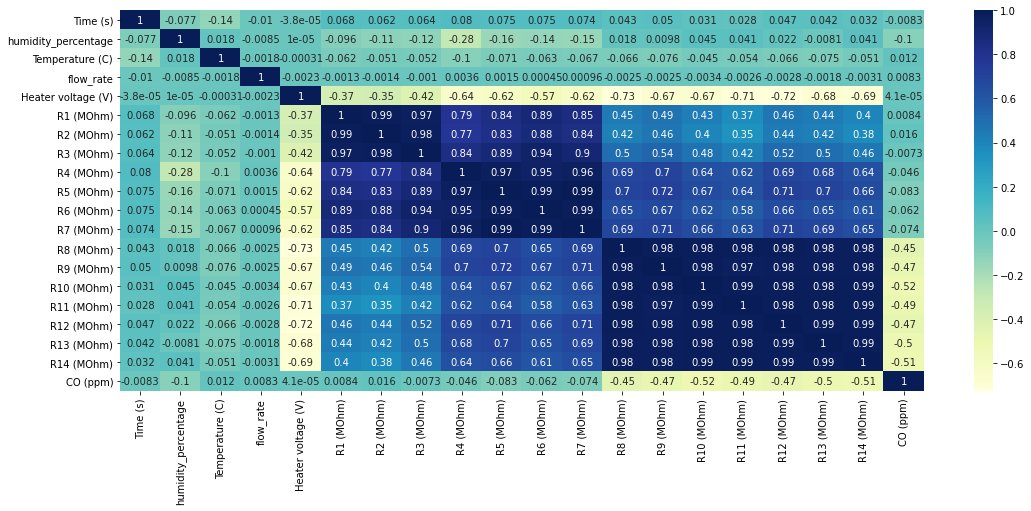

In [16]:
cor=df.corr()
# plotting correlation heatmap
import seaborn as sns
plt.figure(figsize=(18, 7))
dataplot = sns.heatmap(cor, cmap="YlGnBu", annot=True)
  
# displaying heatmap
# plt.figure(figsize=(18, 18))
# plt.figure()
plt.show()

## Filtering dataset and removing features

In [17]:
#  Removing of features on correlation with target variable

# if feature has very low correlation with target variable it can be neglected


def target_cor(cor_matrix,target_feature,lower_limit):

    cor= cor_matrix


    cor_target = abs(cor[target_feature])

    #Selecting highly correlated features
    relevant_features = cor_target[cor_target<lower_limit]
    print(relevant_features)
    return(relevant_features.index)

In [18]:
rem_cor=target_cor(cor,'CO (ppm)',0.2)

NumExpr defaulting to 8 threads.


Time (s)               0.008265
humidity_percentage    0.101320
Temperature (C)        0.011730
flow_rate              0.008333
Heater voltage (V)     0.000041
R1 (MOhm)              0.008403
R2 (MOhm)              0.016305
R3 (MOhm)              0.007253
R4 (MOhm)              0.046358
R5 (MOhm)              0.083171
R6 (MOhm)              0.061642
R7 (MOhm)              0.074091
Name: CO (ppm), dtype: float64


In [19]:
def remove_features(dataset,rem_feature):

    for i in rem_feature:
        try:
            dataset=dataset.drop(columns= i)
            dataset=dataset.reset_index(drop=True)

            print(dataset.shape)

        except:
            print('Missing')

    return(dataset)

In [20]:
dfr=df.copy()
dfr=remove_features(dfr,rem_cor)

(3843160, 19)
(3843160, 18)
(3843160, 17)
(3843160, 16)
(3843160, 15)
(3843160, 14)
(3843160, 13)
(3843160, 12)
(3843160, 11)
(3843160, 10)
(3843160, 9)
(3843160, 8)


In [21]:
dfr.head()

,R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm),CO (ppm)
0,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385,0.0
1,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167,0.0
2,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436,0.0
3,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363,0.0
4,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445,0.0


## Running Linear regression on filtered and reduced (5%) dataset with cor > 0.2

In [49]:
X=dfr.drop(columns = ["CO (ppm)"])
y = dfr["CO (ppm)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=2)



p= len(X_train.columns)
print(p)
n= len(X_train.index)
print(n)

reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.coef_)
print(reg.intercept_)

y_pred = reg.predict(X_train)

print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print("R2: %.2f" % r2_score(y_train, y_pred))


y_pred_test = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred_test)
r2= r2_score(y_test, y_pred_test)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print(Adj_r2)

print("Mean squared error on test data: %.2f" % mean_squared_error(y_test, y_pred_test))
print("R2: %.2f" % r2_score(y_test, y_pred_test))


7
192158
0.4675586106094055
[ 0.30081264  0.39936137 -0.8828629   0.08704525  0.76703403 -0.68081039
 -0.12107128]
11.878724666032937
Mean squared error: 21.99
R2: 0.47
0.4688959454957876
Mean squared error on test data: 21.94
R2: 0.47


In [50]:
X_train.shape

(192158, 7)

In [51]:
X_train.head()

,R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
646725,28.6584,23.6376,25.6229,26.5903,25.8244,21.4715,28.2509
2897170,41.2509,47.3693,50.0936,52.0519,48.1165,45.7841,53.4763
3123092,28.7735,23.1497,29.9089,34.8037,27.3364,19.1965,31.3205
2770429,34.3044,28.1199,30.5588,30.9980,31.9957,29.3116,33.8511
2262452,18.5531,12.7976,14.3303,21.8977,18.2805,17.6031,18.2135


## Making and importing train Dataset

In [53]:
df_train= X_train.copy()

df_train["CO (ppm)"]=y_train

print(df_train.shape)

df_train.head()

(192158, 8)


,R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm),CO (ppm)
646725,28.6584,23.6376,25.6229,26.5903,25.8244,21.4715,28.2509,15.56
2897170,41.2509,47.3693,50.0936,52.0519,48.1165,45.7841,53.4763,4.44
3123092,28.7735,23.1497,29.9089,34.8037,27.3364,19.1965,31.3205,13.33
2770429,34.3044,28.1199,30.5588,30.9980,31.9957,29.3116,33.8511,11.11
2262452,18.5531,12.7976,14.3303,21.8977,18.2805,17.6031,18.2135,6.67


In [55]:
df_train.shape

(192158, 8)

In [56]:
df_train.to_csv("gsd_train_7.csv",index=False)

## Making and importing test dataste

In [57]:
df_test= X_test.copy()

df_test["CO (ppm)"]=y_test

print(df_test.shape)

df_test.head()

(3651002, 8)


,R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm),CO (ppm)
872743,21.0696,17.9175,16.9643,20.2340,21.5981,16.8939,21.0094,17.78
169559,21.0169,15.7608,18.1072,25.2352,20.2748,14.6450,21.2291,13.33
1433257,31.1677,23.9872,25.0764,30.5508,27.7955,24.6277,28.6404,13.33
2314651,45.2505,36.6026,38.1095,36.4222,39.3537,34.7718,41.9167,8.89
1004645,55.6363,50.5204,53.8273,52.0519,54.4059,48.3640,57.4449,4.44


In [59]:
df_test.shape

(3651002, 8)

In [60]:
df_test.to_csv("gsd_test_7.csv",index=False)

## Importing train test datsets 

In [61]:
X_train.to_csv("gsd_xtrain_7.csv",index=False)

y_train.to_csv("gsd_ytrain_7.csv",index=False)

In [62]:
X_test.to_csv("gsd_xtest_7.csv",index=False)

y_test.to_csv("gsd_ytest_7.csv",index=False)